In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import roc_auc_score, matthews_corrcoef
from os.path import join
import os
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import re
import warnings
from additional_code.helper_functions import *
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.8.4/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


/Users/vahidatabaigi/SIP/ESP_HardSplits/notebooks_and_code


# Data Leakage in ESP model

In [7]:
train_ESP=pd.read_pickle(join(CURRENT_DIR, "..","data","data_ESP","df_train_with_ESM1b_ts_GNN.pkl"))
test_ESP=pd.read_pickle(join(CURRENT_DIR, "..","data","data_ESP","df_test_with_ESM1b_ts_GNN.pkl"))

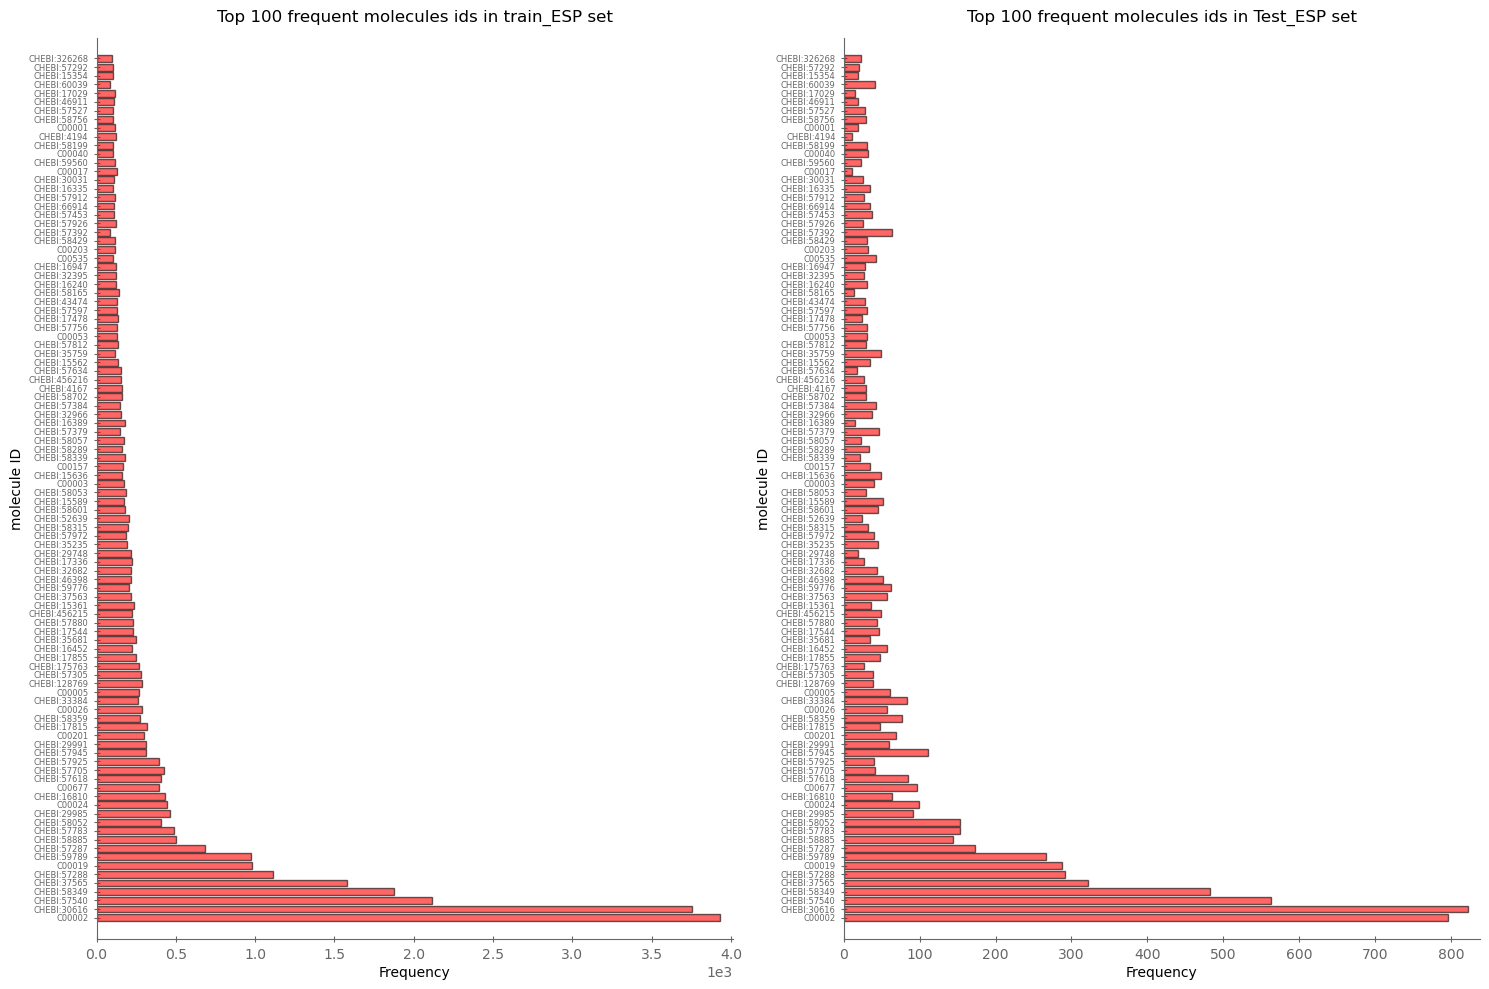

In [8]:
plot_top_keys_values_multiple_df(
    dfs=[train_ESP,test_ESP], 
    df_names=[ 'train_ESP','Test_ESP'],
    key_column='molecule ID', 
    xlabel='Frequency', 
    ylabel='molecule ID', 
    title='Top {top_count} frequent molecules ids in {df_name} set', 
    top_count=100,
    title_fontsize=12 )

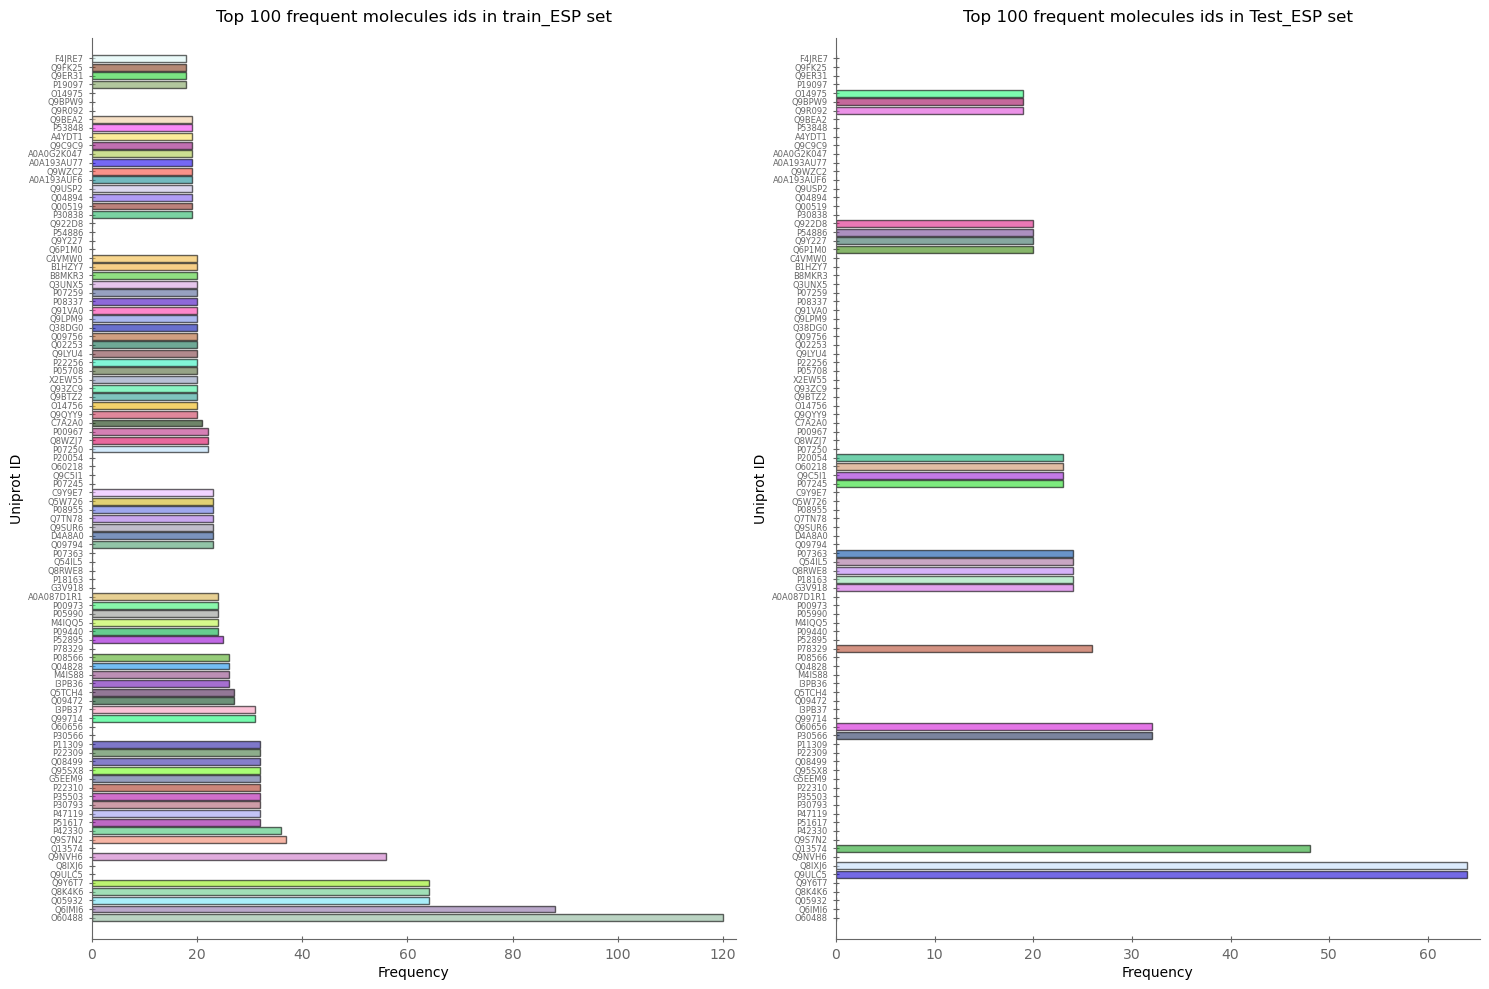

In [10]:
plot_top_keys_values_multiple_df(
    dfs=[train_ESP,test_ESP], 
    df_names=[ 'train_ESP','Test_ESP'],
    key_column='Uniprot ID', 
    xlabel='Frequency', 
    ylabel='Uniprot ID', 
    title='Top {top_count} frequent molecules ids in {df_name} set', 
    top_count=100,
    title_fontsize=12 )

# 2 Splits

### ROC-AUC score for 1D split

In [2]:
y_test_pred_esm1b_ts_ecfp_ESPC1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESPC1f_2S.npy"))
test_y_esm1b_ts_ecfp_ESPC1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESPC1f_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESPC1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESPC1f_2S.npy"))
test_y_esm1b_ts_gnn_ESPC1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESPC1f_2S.npy"))
y_test_pred_esm1b_ts_ecfp_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e_2S.npy"))
test_y_esm1b_ts_ecfp_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e_2S.npy"))
y_test_pred_esm1b_ts_gnn_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1e_2S.npy"))
test_y_esm1b_ts_gnn_C1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1e_2S.npy"))
y_test_pred_esm1b_ts_ecfp_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f_2S.npy"))
test_y_esm1b_ts_ecfp_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f_2S.npy"))
y_test_pred_esm1b_ts_gnn_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1f_2S.npy"))
test_y_esm1b_ts_gnn_C1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1f_2S.npy"))
y_test_pred_esm1b_ts_ecfp_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1e_2S.npy"))
test_y_esm1b_ts_ecfp_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1e_2S.npy"))
y_test_pred_esm1b_ts_gnn_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1e_2S.npy"))
test_y_esm1b_ts_gnn_I1e_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1e_2S.npy"))
y_test_pred_esm1b_ts_ecfp_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1f_2S.npy"))
test_y_esm1b_ts_ecfp_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1f_2S.npy"))
y_test_pred_esm1b_ts_gnn_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1f_2S.npy"))
test_y_esm1b_ts_gnn_I1f_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1f_2S.npy"))

In [3]:
fpr_esm1b_ts_ecfp_ESPC1f_2S, tpr_esm1b_ts_ecfp_ESPC1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESPC1f_2S, y_test_pred_esm1b_ts_ecfp_ESPC1f_2S)
roc_auc_esm1b_ts_ecfp_ESPC1f_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESPC1f_2S, tpr_esm1b_ts_ecfp_ESPC1f_2S)
fpr_esm1b_ts_gnn_ESPC1f_2S, tpr_esm1b_ts_gnn_ESPC1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESPC1f_2S, y_test_pred_esm1b_ts_gnn_ESPC1f_2S)
roc_auc_esm1b_ts_gnn_ESPC1f_2S = metrics.auc(fpr_esm1b_ts_gnn_ESPC1f_2S, tpr_esm1b_ts_gnn_ESPC1f_2S)

fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e_2S, y_test_pred_esm1b_ts_ecfp_C1e_2S)
roc_auc_esm1b_ts_ecfp_C1e_2S = metrics.auc(fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S)
fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e_2S, y_test_pred_esm1b_ts_gnn_C1e_2S)
roc_auc_esm1b_ts_gnn_C1e_2S = metrics.auc(fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S)


fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f_2S, y_test_pred_esm1b_ts_ecfp_C1f_2S)
roc_auc_esm1b_ts_ecfp_C1f_2S = metrics.auc(fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S)
fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f_2S, y_test_pred_esm1b_ts_gnn_C1f_2S)
roc_auc_esm1b_ts_gnn_C1f_2S = metrics.auc(fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S)


fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1e_2S, y_test_pred_esm1b_ts_ecfp_I1e_2S)
roc_auc_esm1b_ts_ecfp_I1e_2S = metrics.auc(fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S)
fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1e_2S, y_test_pred_esm1b_ts_gnn_I1e_2S)
roc_auc_esm1b_ts_gnn_I1e_2S = metrics.auc(fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S)

fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1f_2S, y_test_pred_esm1b_ts_ecfp_I1f_2S)
roc_auc_esm1b_ts_ecfp_I1f_2S = metrics.auc(fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S)
fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1f_2S, y_test_pred_esm1b_ts_gnn_I1f_2S)
roc_auc_esm1b_ts_gnn_I1f_2S = metrics.auc(fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S)

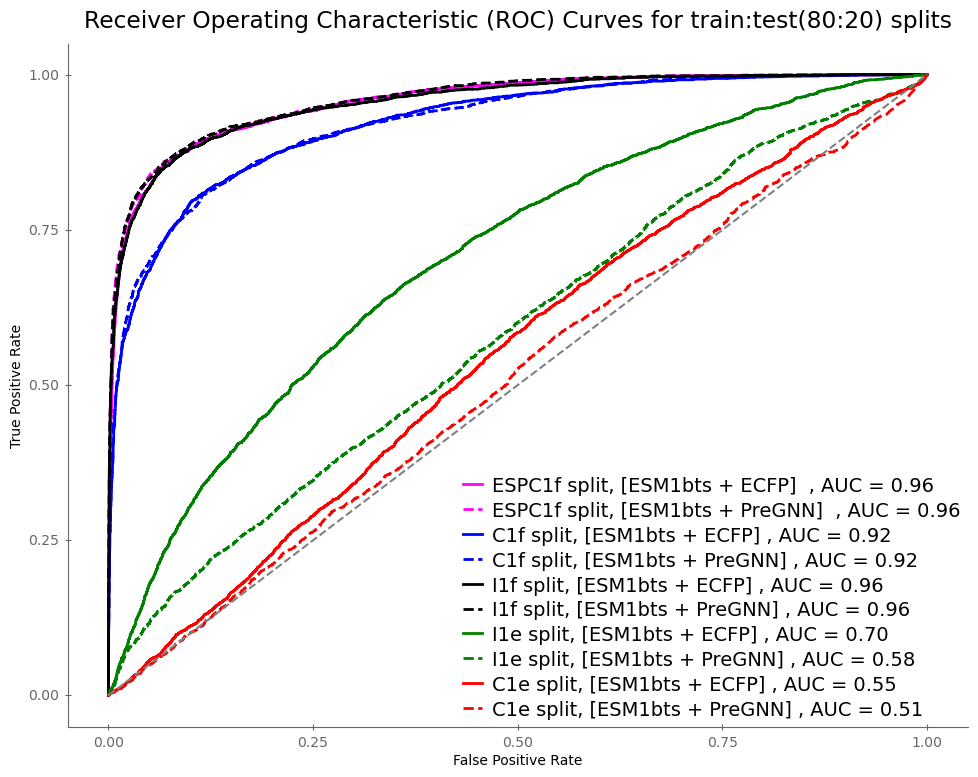

In [4]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} , AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 14}) 

# Define your data and labels here
data = [
    (fpr_esm1b_ts_ecfp_ESPC1f_2S, tpr_esm1b_ts_ecfp_ESPC1f_2S, roc_auc_esm1b_ts_ecfp_ESPC1f_2S, 'ESPC1f split, [ESM1bts + ECFP] ', 'solid', 'magenta'),
    (fpr_esm1b_ts_gnn_ESPC1f_2S, tpr_esm1b_ts_gnn_ESPC1f_2S, roc_auc_esm1b_ts_gnn_ESPC1f_2S, 'ESPC1f split, [ESM1bts + PreGNN] ', 'dashed', 'magenta'),
    (fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, roc_auc_esm1b_ts_ecfp_C1f_2S, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, roc_auc_esm1b_ts_gnn_C1f_2S, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),
    (fpr_esm1b_ts_ecfp_I1f_2S, tpr_esm1b_ts_ecfp_I1f_2S, roc_auc_esm1b_ts_ecfp_I1f_2S, 'I1f split, [ESM1bts + ECFP]', 'solid', 'black'),
    (fpr_esm1b_ts_gnn_I1f_2S, tpr_esm1b_ts_gnn_I1f_2S, roc_auc_esm1b_ts_gnn_I1f_2S, 'I1f split, [ESM1bts + PreGNN]', 'dashed', 'black'),
    (fpr_esm1b_ts_ecfp_I1e_2S, tpr_esm1b_ts_ecfp_I1e_2S, roc_auc_esm1b_ts_ecfp_I1e_2S, 'I1e split, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_I1e_2S, tpr_esm1b_ts_gnn_I1e_2S, roc_auc_esm1b_ts_gnn_I1e_2S, 'I1e split, [ESM1bts + PreGNN]', 'dashed', 'green'),
    (fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, roc_auc_esm1b_ts_ecfp_C1e_2S, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, roc_auc_esm1b_ts_gnn_C1e_2S, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
]

# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], '--', color='gray', linewidth=1.5) 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05])  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test(80:20) splits')
#plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


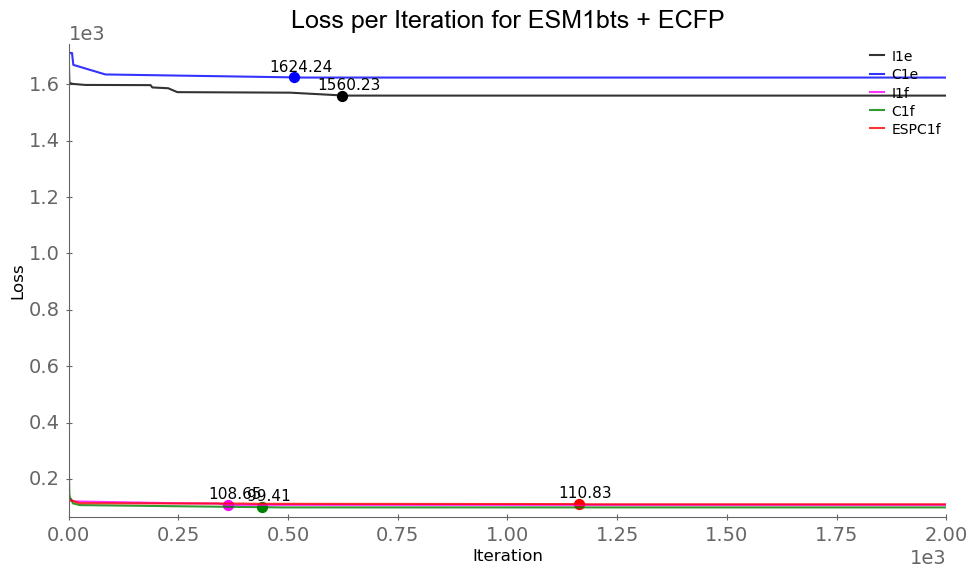

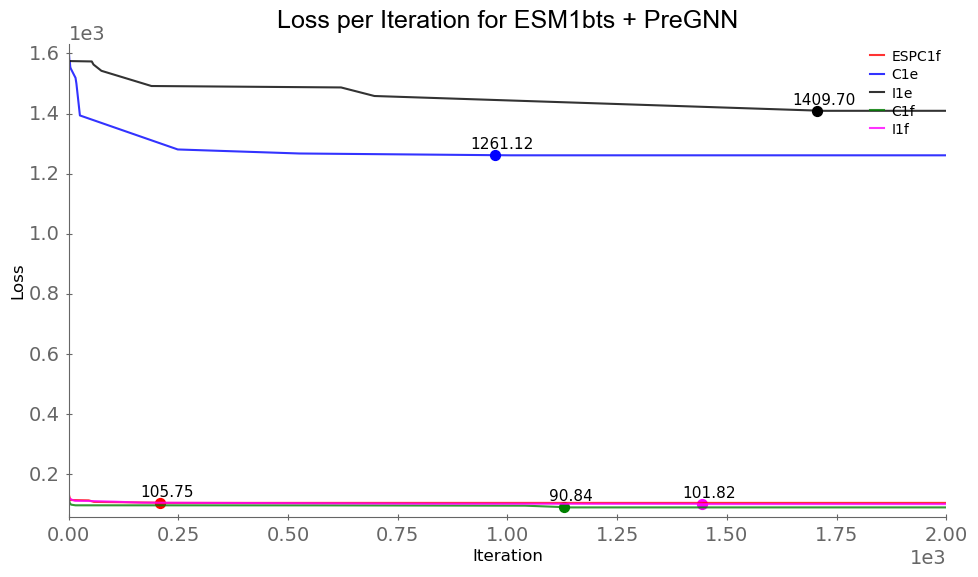

In [5]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESPC1f': 'red', 'C1e': 'blue', 'C1f': 'green', 'I1e': 'black', 'I1f': 'magenta'}

plotting_loss("ECFP", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=2)
plotting_loss("PreGNN", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=2)

### ROC-AUC score for 2D split

In [6]:
y_test_pred_esm1b_ts_gnn_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data","training_results_2S","y_test_pred_xgboost_ESM1b_ts_PreGNN_C2_2S.npy"))
test_y_esm1b_ts_gnn_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S",  "y_test_true_xgboost_ESM1b_ts_PreGNN_C2_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S","y_test_pred_xgboost_ESM1b_ts_PreGNN_ESPC2_2S.npy"))
test_y_esm1b_ts_gnn_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESPC2_2S.npy"))

In [7]:
y_test_pred_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
test_y_esm1b_ts_ecfp_C2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_C2_2S.npy"))
y_test_pred_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))
test_y_esm1b_ts_ecfp_ESPC2_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESPC2_2S.npy"))

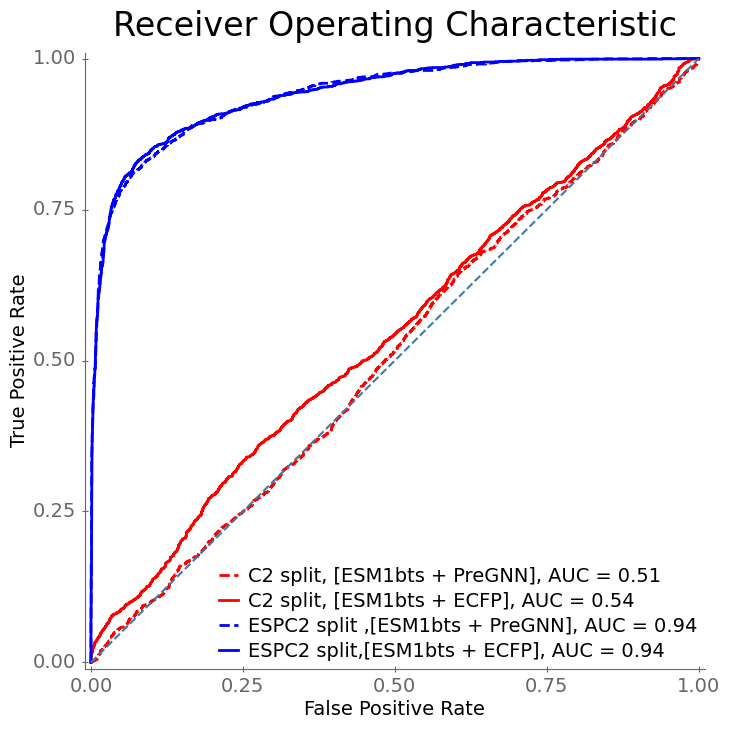

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 20})

fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S)
roc_auc_esm1b_ts_ecfp_C2_2S = metrics.auc(fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S)
fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S)
roc_auc_esm1b_ts_ecfp_ESPC2_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S)

fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C2_2S, y_test_pred_esm1b_ts_gnn_C2_2S)
roc_auc_esm1b_ts_gnn_C2_2S = metrics.auc(fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S)
fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESPC2_2S, y_test_pred_esm1b_ts_gnn_ESPC2_2S)
roc_auc_esm1b_ts_gnn_ESPC2_2S = metrics.auc(fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, 'red', label='C2 split, [ESM1bts + PreGNN], AUC = %0.2f' % roc_auc_esm1b_ts_gnn_C2_2S, linewidth=2.0, linestyle='dashed')
plt.plot(fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, 'red', label='C2 split, [ESM1bts + ECFP], AUC = %0.2f' % roc_auc_esm1b_ts_ecfp_C2_2S, linewidth=2.0)
plt.plot(fpr_esm1b_ts_gnn_ESPC2_2S, tpr_esm1b_ts_gnn_ESPC2_2S, 'blue', label='ESPC2 split ,[ESM1bts + PreGNN], AUC = %0.2f' % roc_auc_esm1b_ts_gnn_ESPC2_2S, linewidth=2.0, linestyle='dashed')
plt.plot(fpr_esm1b_ts_ecfp_ESPC2_2S, tpr_esm1b_ts_ecfp_ESPC2_2S, 'blue', label='ESPC2 split,[ESM1bts + ECFP], AUC = %0.2f' % roc_auc_esm1b_ts_ecfp_ESPC2_2S, linewidth=2.0)


ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


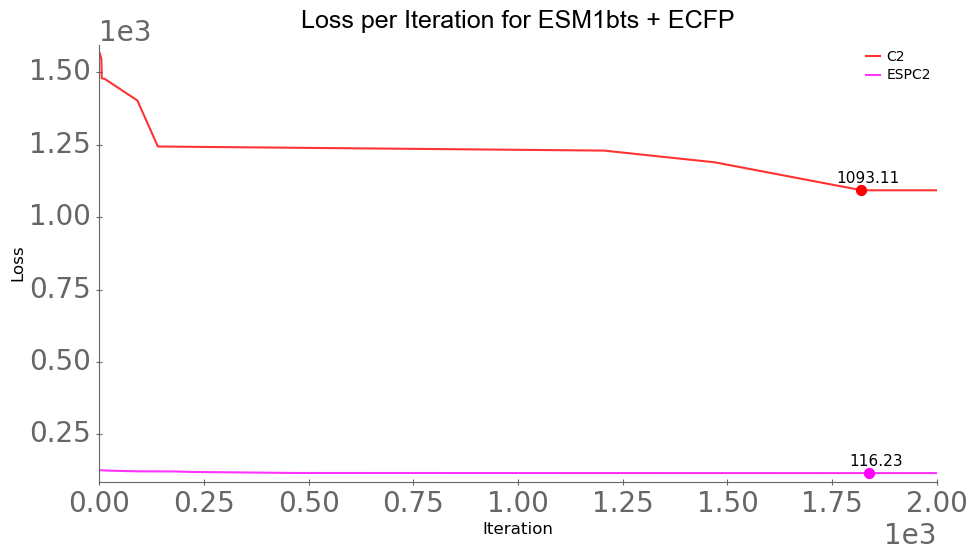

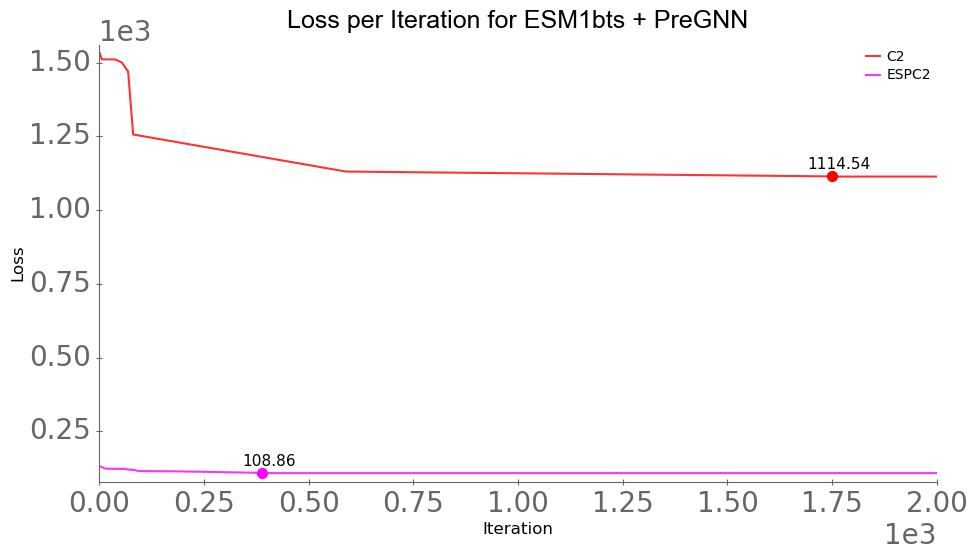

In [9]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESPC2': 'magenta', 'C2': 'red'}

plotting_loss("ECFP", experiment="2D", log_directory=log_directory, color_map=color_map, split_number=2)
plotting_loss("PreGNN", experiment="2D", log_directory=log_directory, color_map=color_map, split_number=2)

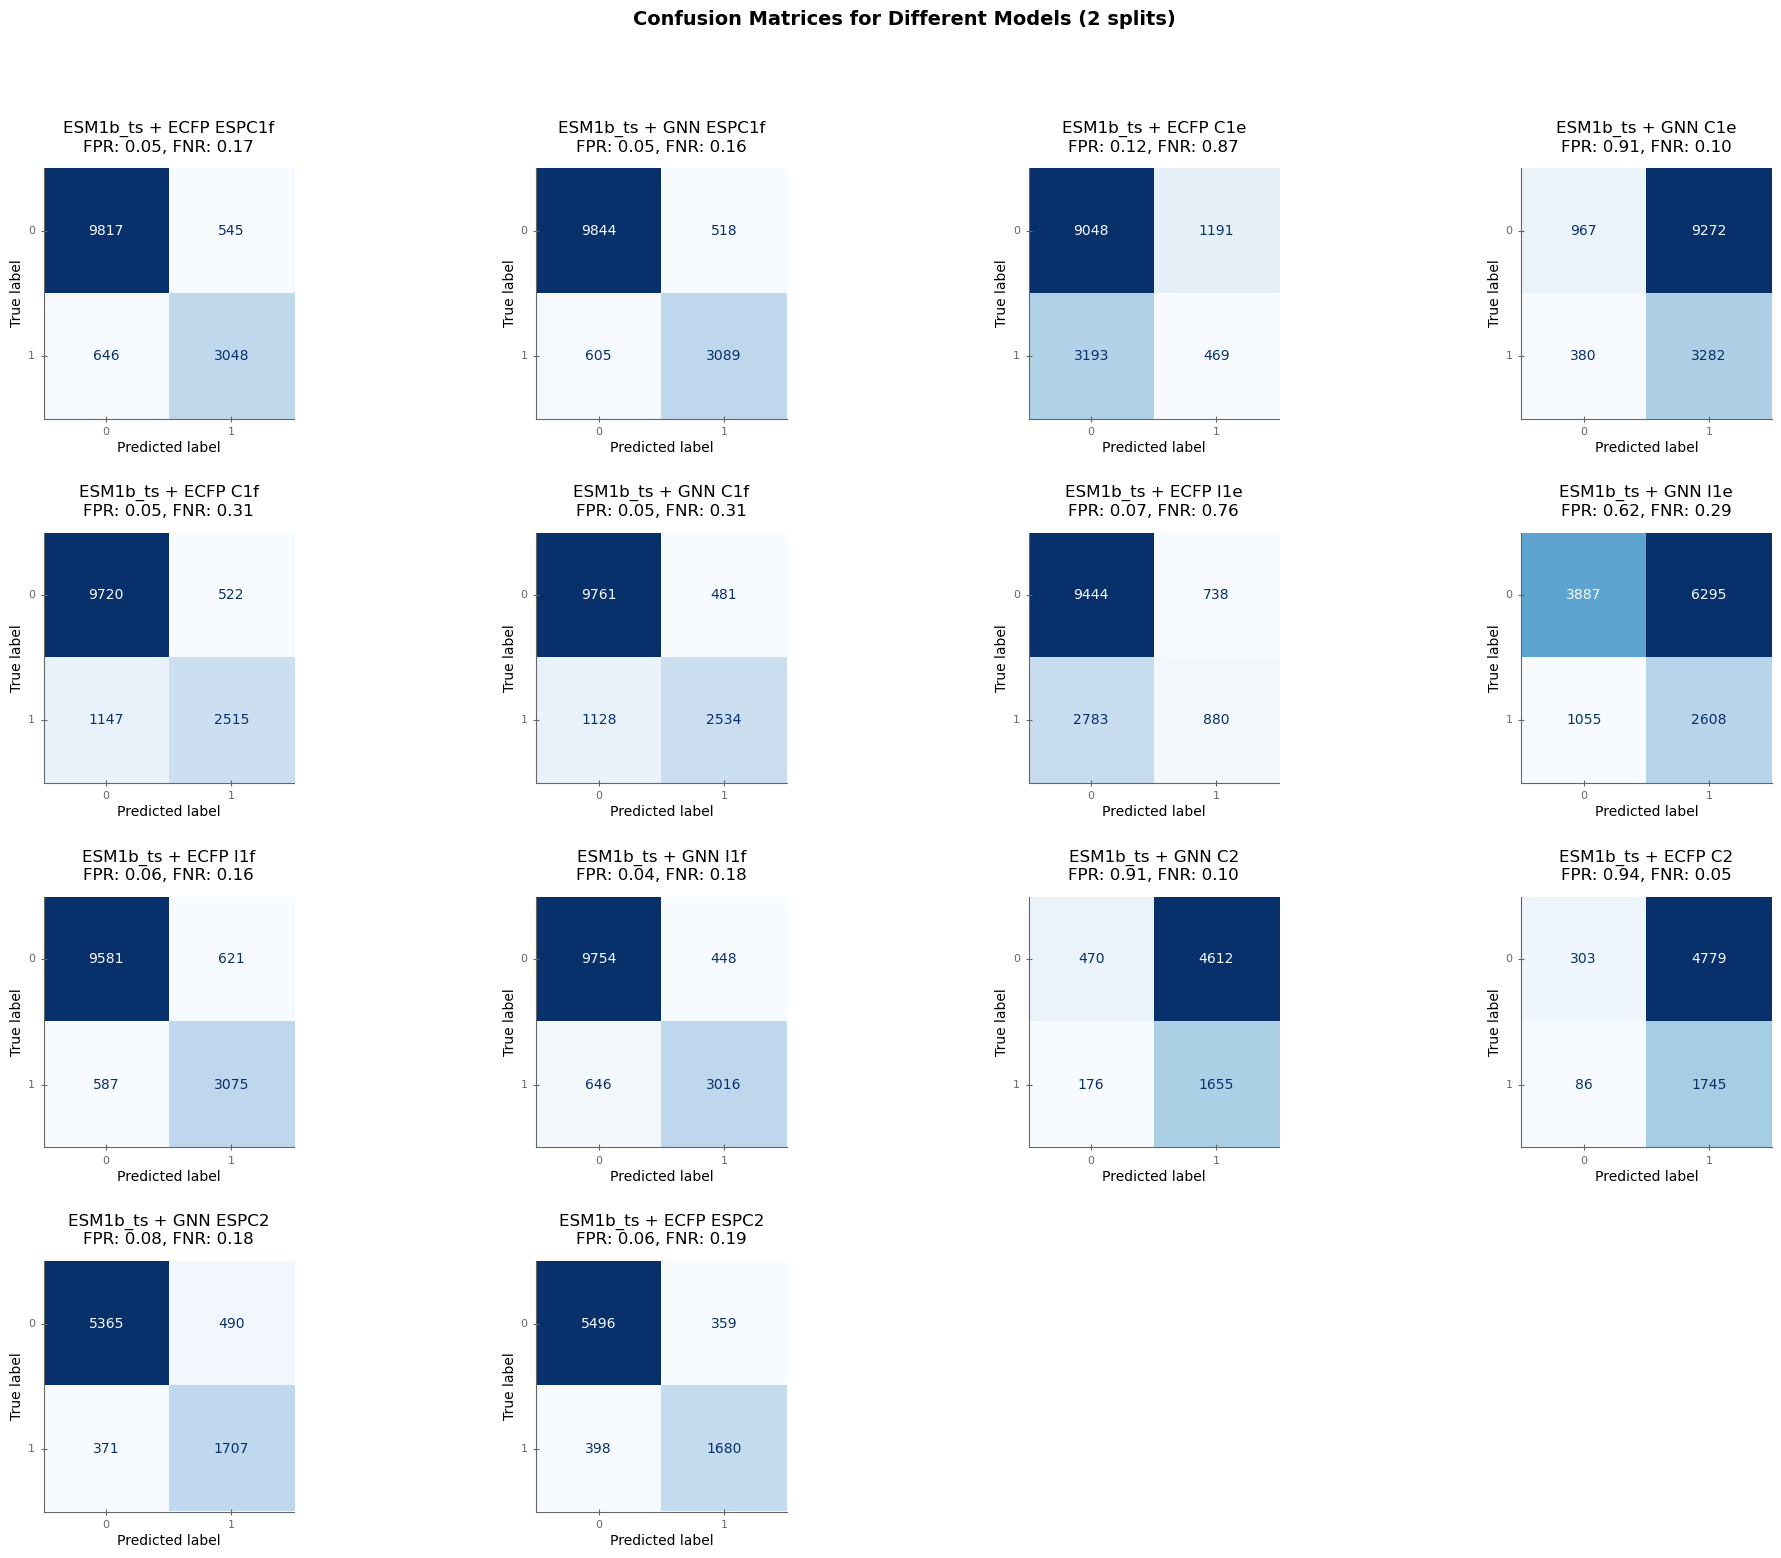

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def calculate_fpr_fnr(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    fpr = FP / (FP + TN)
    fnr = FN / (FN + TP)
    return fpr, fnr, cm
datasets = [
    ('ECFP ESPC1f', test_y_esm1b_ts_ecfp_ESPC1f_2S, y_test_pred_esm1b_ts_ecfp_ESPC1f_2S),
    ('GNN ESPC1f', test_y_esm1b_ts_gnn_ESPC1f_2S, y_test_pred_esm1b_ts_gnn_ESPC1f_2S),
    ('ECFP C1e', test_y_esm1b_ts_ecfp_C1e_2S, y_test_pred_esm1b_ts_ecfp_C1e_2S),
    ('GNN C1e', test_y_esm1b_ts_gnn_C1e_2S, y_test_pred_esm1b_ts_gnn_C1e_2S),
    ('ECFP C1f', test_y_esm1b_ts_ecfp_C1f_2S, y_test_pred_esm1b_ts_ecfp_C1f_2S),
    ('GNN C1f', test_y_esm1b_ts_gnn_C1f_2S, y_test_pred_esm1b_ts_gnn_C1f_2S),
    ('ECFP I1e', test_y_esm1b_ts_ecfp_I1e_2S, y_test_pred_esm1b_ts_ecfp_I1e_2S),
    ('GNN I1e', test_y_esm1b_ts_gnn_I1e_2S, y_test_pred_esm1b_ts_gnn_I1e_2S),
    ('ECFP I1f', test_y_esm1b_ts_ecfp_I1f_2S, y_test_pred_esm1b_ts_ecfp_I1f_2S),
    ('GNN I1f', test_y_esm1b_ts_gnn_I1f_2S, y_test_pred_esm1b_ts_gnn_I1f_2S),
    ('GNN C2', test_y_esm1b_ts_gnn_C2_2S, y_test_pred_esm1b_ts_gnn_C2_2S),
    ('ECFP C2', test_y_esm1b_ts_ecfp_C2_2S, y_test_pred_esm1b_ts_ecfp_C2_2S),
    ('GNN ESPC2', test_y_esm1b_ts_gnn_ESPC2_2S, y_test_pred_esm1b_ts_gnn_ESPC2_2S),
    ('ECFP ESPC2', test_y_esm1b_ts_ecfp_ESPC2_2S, y_test_pred_esm1b_ts_ecfp_ESPC2_2S)
]

n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
fig.suptitle('Confusion Matrices for Different Models (2 splits) ', fontsize=14)
for i, (name, y_true, y_pred) in enumerate(datasets):
    fpr, fnr, cm = calculate_fpr_fnr(y_true, y_pred)
    row, col = divmod(i, n_cols)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col], cmap='Blues', colorbar=False)
    axes[row, col].set_title(f"ESM1b_ts + {name}\nFPR: {fpr:.2f}, FNR: {fnr:.2f}", fontsize=12)
    for text in axes[row, col].texts:
        text.set_fontsize(10)
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)
    axes[row, col].set_xlabel(axes[row, col].get_xlabel(), fontsize=10)
    axes[row, col].set_ylabel(axes[row, col].get_ylabel(), fontsize=10)
for j in range(len(datasets), n_rows * n_cols):
    fig.delaxes(axes.flat[j])
plt.subplots_adjust(hspace=0.9, wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### ROC-AUC score for 1D split and NoATP

In [12]:
y_test_pred_esm1b_ts_ecfp_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_D3408_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_D3408_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_D3408_2S.npy"))
test_y_esm1b_ts_gnn_ESP_D3408_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_D3408_2S.npy"))

y_test_pred_esm1b_ts_ecfp_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESP_NOATP_2S.npy"))
test_y_esm1b_ts_ecfp_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESP_NOATP_2S.npy"))
y_test_pred_esm1b_ts_gnn_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESP_NOATP_2S.npy"))
test_y_esm1b_ts_gnn_ESP_NoATP_2S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_2S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESP_NOATP_2S.npy"))



In [13]:

fpr_esm1b_ts_ecfp_ESP_D3408_2S, tpr_esm1b_ts_ecfp_ESP_D3408_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_D3408_2S, y_test_pred_esm1b_ts_ecfp_ESP_D3408_2S)
roc_auc_esm1b_ts_ecfp_ESP_D3408_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_D3408_2S, tpr_esm1b_ts_ecfp_ESP_D3408_2S)
fpr_esm1b_ts_gnn_ESP_D3408_2S, tpr_esm1b_ts_gnn_ESP_D3408_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_D3408_2S, y_test_pred_esm1b_ts_gnn_ESP_D3408_2S)
roc_auc_esm1b_ts_gnn_ESP_D3408_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_D3408_2S, tpr_esm1b_ts_gnn_ESP_D3408_2S)

fpr_esm1b_ts_ecfp_ESP_NoATP_2S, tpr_esm1b_ts_ecfp_ESP_NoATP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESP_NoATP_2S, y_test_pred_esm1b_ts_ecfp_ESP_NoATP_2S)
roc_auc_esm1b_ts_ecfp_ESP_NoATP_2S = metrics.auc(fpr_esm1b_ts_ecfp_ESP_NoATP_2S, tpr_esm1b_ts_ecfp_ESP_NoATP_2S)
fpr_esm1b_ts_gnn_ESP_NoATP_2S, tpr_esm1b_ts_gnn_ESP_NoATP_2S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESP_NoATP_2S, y_test_pred_esm1b_ts_gnn_ESP_NoATP_2S)
roc_auc_esm1b_ts_gnn_ESP_NoATP_2S = metrics.auc(fpr_esm1b_ts_gnn_ESP_NoATP_2S, tpr_esm1b_ts_gnn_ESP_NoATP_2S)


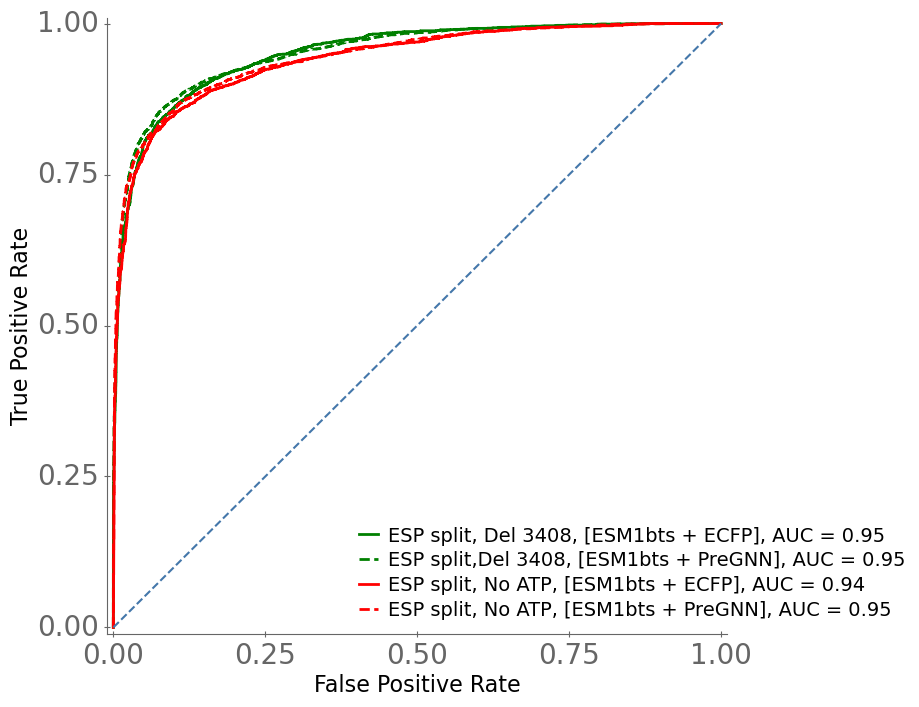

In [14]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label}, AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 20})

# Define your data and labels here
data = [
    
    (fpr_esm1b_ts_ecfp_ESP_D3408_2S, tpr_esm1b_ts_ecfp_ESP_D3408_2S, roc_auc_esm1b_ts_ecfp_ESP_D3408_2S, 'ESP split, Del 3408, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_ESP_D3408_2S, tpr_esm1b_ts_gnn_ESP_D3408_2S, roc_auc_esm1b_ts_gnn_ESP_D3408_2S, 'ESP split,Del 3408, [ESM1bts + PreGNN]', 'dashed', 'green'),
    
    (fpr_esm1b_ts_ecfp_ESP_NoATP_2S, tpr_esm1b_ts_ecfp_ESP_NoATP_2S, roc_auc_esm1b_ts_ecfp_ESP_NoATP_2S, 'ESP split, No ATP, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_ESP_NoATP_2S, tpr_esm1b_ts_gnn_ESP_NoATP_2S, roc_auc_esm1b_ts_gnn_ESP_NoATP_2S, 'ESP split, No ATP, [ESM1bts + PreGNN]', 'dashed', 'red'),

]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', bbox_to_anchor=(1.30, 0.01), fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.show()


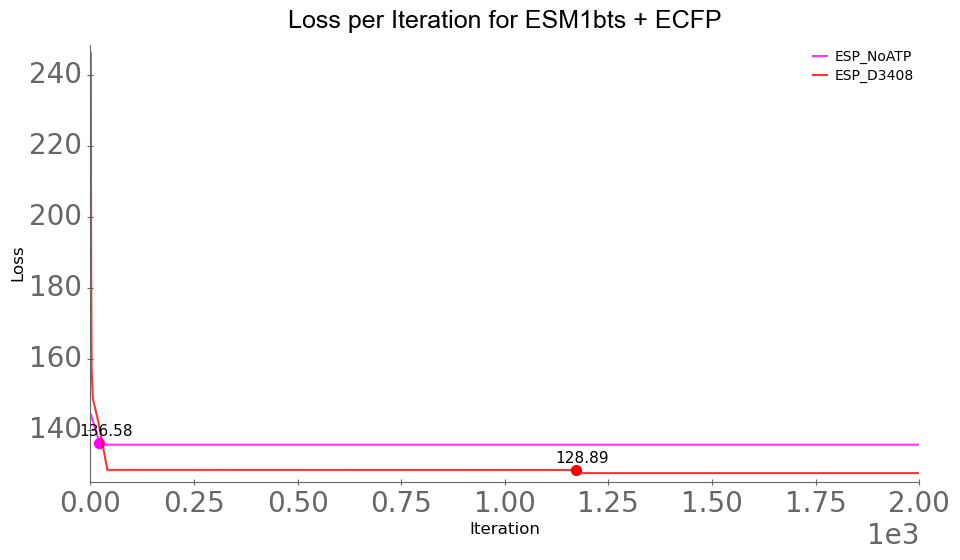

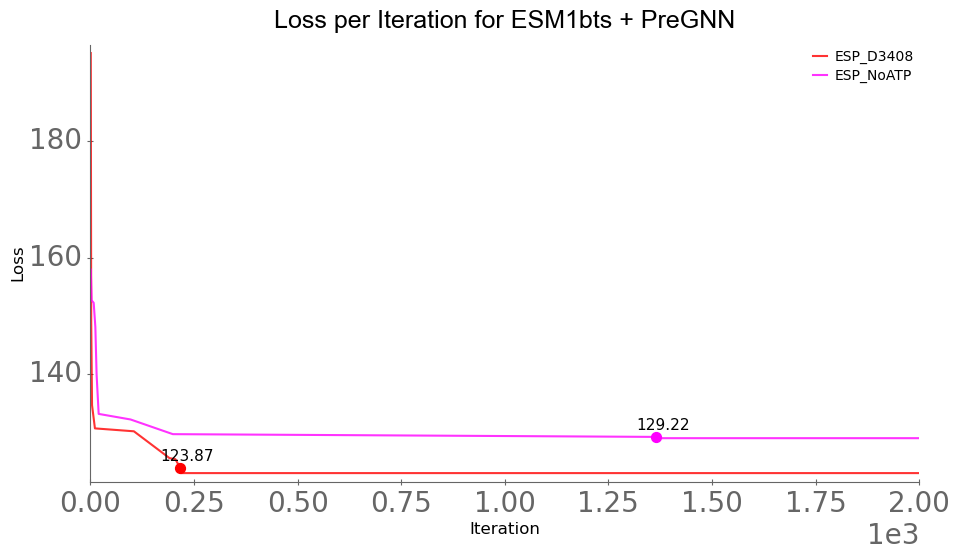

In [15]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESP_NoATP': 'magenta', 'ESP_D3408': 'red'}

plotting_loss("ECFP", experiment="NoATP", log_directory=log_directory, color_map=color_map, split_number=2)
plotting_loss("PreGNN", experiment="NoATP", log_directory=log_directory, color_map=color_map, split_number=2)

# 3 splits

### ROC-AUC score for 1D split

In [21]:
y_test_pred_esm1b_ts_ecfp_ESPC1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_ESPC1f_3S.npy"))
test_y_esm1b_ts_ecfp_ESPC1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_ESPC1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_ESPC1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_ESPC1f_3S.npy"))
test_y_esm1b_ts_gnn_ESPC1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_ESPC1f_3S.npy"))


y_test_pred_esm1b_ts_ecfp_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
test_y_esm1b_ts_ecfp_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))
test_y_esm1b_ts_gnn_C1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
test_y_esm1b_ts_ecfp_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))
test_y_esm1b_ts_gnn_C1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_C1f_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
test_y_esm1b_ts_ecfp_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1e_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))
test_y_esm1b_ts_gnn_I1e_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1e_3S.npy"))

y_test_pred_esm1b_ts_ecfp_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
test_y_esm1b_ts_ecfp_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_ECFP_I1f_3S.npy"))
y_test_pred_esm1b_ts_gnn_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_pred_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))
test_y_esm1b_ts_gnn_I1f_3S =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results_3S", "y_test_true_xgboost_ESM1b_ts_PreGNN_I1f_3S.npy"))


In [22]:
fpr_esm1b_ts_ecfp_ESPC1f_3S, tpr_esm1b_ts_ecfp_ESPC1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_ESPC1f_3S, y_test_pred_esm1b_ts_ecfp_ESPC1f_3S)
roc_auc_esm1b_ts_ecfp_ESPC1f_3S = metrics.auc(fpr_esm1b_ts_ecfp_ESPC1f_3S, tpr_esm1b_ts_ecfp_ESPC1f_3S)
fpr_esm1b_ts_gnn_ESPC1f_3S, tpr_esm1b_ts_gnn_ESPC1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_ESPC1f_3S, y_test_pred_esm1b_ts_gnn_ESPC1f_3S)
roc_auc_esm1b_ts_gnn_ESPC1f_3S = metrics.auc(fpr_esm1b_ts_gnn_ESPC1f_3S, tpr_esm1b_ts_gnn_ESPC1f_3S)

fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e_3S, y_test_pred_esm1b_ts_ecfp_C1e_3S)
roc_auc_esm1b_ts_ecfp_C1e_3S = metrics.auc(fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S)
fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e_3S, y_test_pred_esm1b_ts_gnn_C1e_3S)
roc_auc_esm1b_ts_gnn_C1e_3S = metrics.auc(fpr_esm1b_ts_gnn_C1e, tpr_esm1b_ts_gnn_C1e)

fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f_3S, y_test_pred_esm1b_ts_ecfp_C1f_3S)
roc_auc_esm1b_ts_ecfp_C1f_3S = metrics.auc(fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S)
fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f_3S, y_test_pred_esm1b_ts_gnn_C1f_3S)
roc_auc_esm1b_ts_gnn_C1f_3S = metrics.auc(fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S)


fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1e_3S, y_test_pred_esm1b_ts_ecfp_I1e_3S)
roc_auc_esm1b_ts_ecfp_I1e_3S = metrics.auc(fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S)
fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1e_3S, y_test_pred_esm1b_ts_gnn_I1e_3S)
roc_auc_esm1b_ts_gnn_I1e_3S = metrics.auc(fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S)

fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_I1f_3S, y_test_pred_esm1b_ts_ecfp_I1f_3S)
roc_auc_esm1b_ts_ecfp_I1f_3S = metrics.auc(fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f)
fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_I1f_3S, y_test_pred_esm1b_ts_gnn_I1f_3S)
roc_auc_esm1b_ts_gnn_I1f_3S = metrics.auc(fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S)


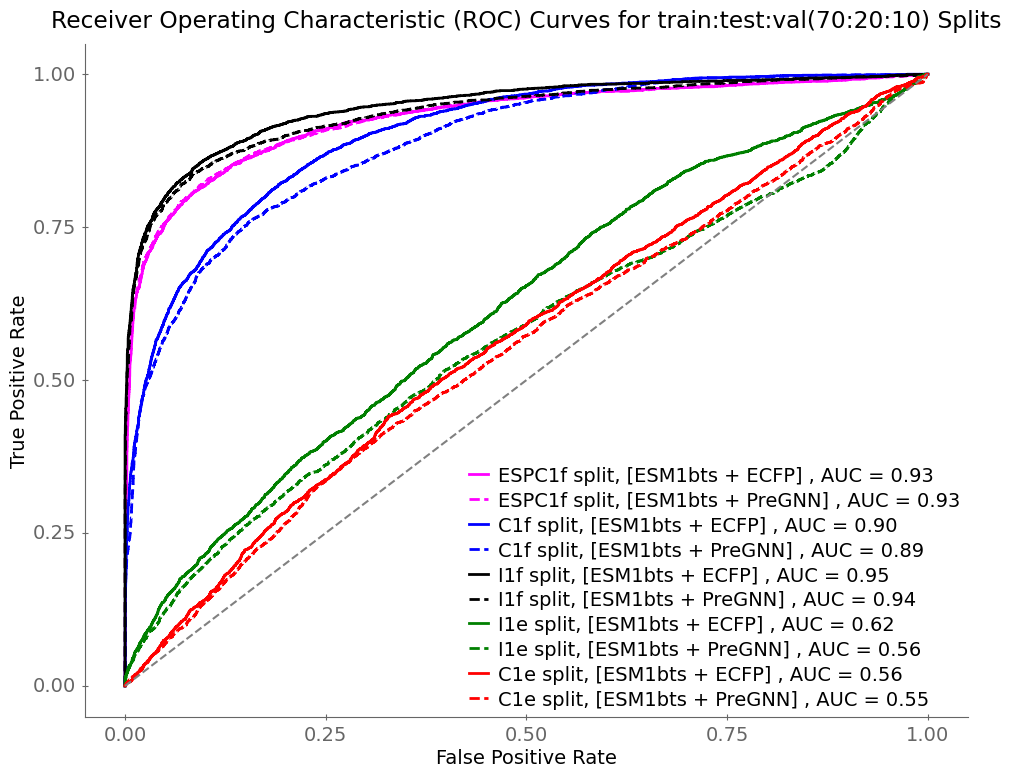

In [23]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} , AUC = {roc_auc:.2f}', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({'font.size': 14}) 

# Define your data and labels here
data = [
    (fpr_esm1b_ts_ecfp_ESPC1f_3S, tpr_esm1b_ts_ecfp_ESPC1f_3S, roc_auc_esm1b_ts_ecfp_ESPC1f_3S, 'ESPC1f split, [ESM1bts + ECFP]', 'solid', 'magenta'),
    (fpr_esm1b_ts_gnn_ESPC1f_3S, tpr_esm1b_ts_gnn_ESPC1f_3S, roc_auc_esm1b_ts_gnn_ESPC1f_3S, 'ESPC1f split, [ESM1bts + PreGNN]', 'dashed', 'magenta'),
    (fpr_esm1b_ts_ecfp_C1f_3S, tpr_esm1b_ts_ecfp_C1f_3S, roc_auc_esm1b_ts_ecfp_C1f_3S, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f_3S, tpr_esm1b_ts_gnn_C1f_3S, roc_auc_esm1b_ts_gnn_C1f_3S, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),
    (fpr_esm1b_ts_ecfp_I1f_3S, tpr_esm1b_ts_ecfp_I1f_3S, roc_auc_esm1b_ts_ecfp_I1f_3S, 'I1f split, [ESM1bts + ECFP]', 'solid', 'black'),
    (fpr_esm1b_ts_gnn_I1f_3S, tpr_esm1b_ts_gnn_I1f_3S, roc_auc_esm1b_ts_gnn_I1f_3S, 'I1f split, [ESM1bts + PreGNN]', 'dashed', 'black'),
    (fpr_esm1b_ts_ecfp_I1e_3S, tpr_esm1b_ts_ecfp_I1e_3S, roc_auc_esm1b_ts_ecfp_I1e_3S, 'I1e split, [ESM1bts + ECFP]', 'solid', 'green'),
    (fpr_esm1b_ts_gnn_I1e_3S, tpr_esm1b_ts_gnn_I1e_3S, roc_auc_esm1b_ts_gnn_I1e_3S, 'I1e split, [ESM1bts + PreGNN]', 'dashed', 'green'),
    (fpr_esm1b_ts_ecfp_C1e_3S, tpr_esm1b_ts_ecfp_C1e_3S, roc_auc_esm1b_ts_ecfp_C1e_3S, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e_3S, tpr_esm1b_ts_gnn_C1e_3S, roc_auc_esm1b_ts_gnn_C1e_3S, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
]

# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], '--', color='gray', linewidth=1.5)
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05]) 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test:val(70:20:10) Splits')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


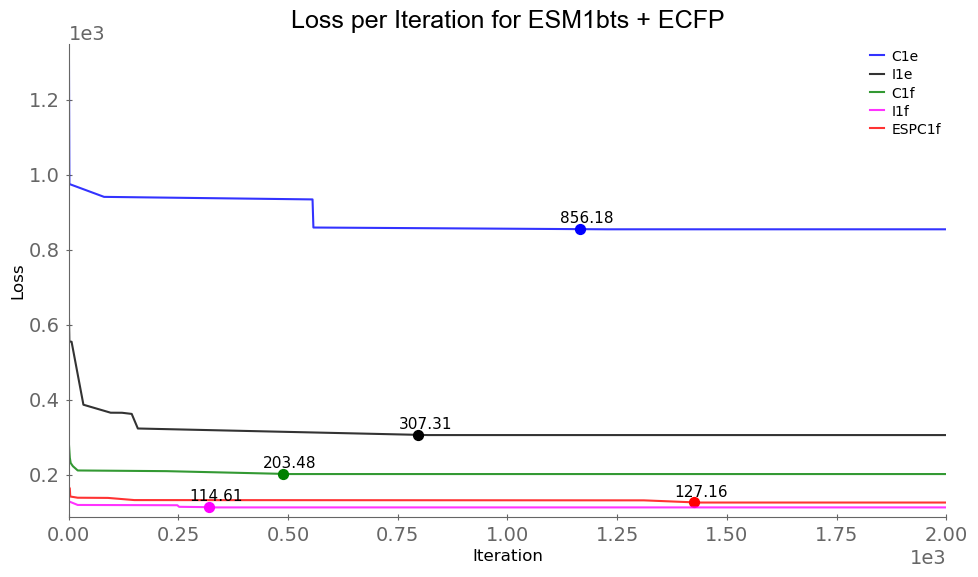

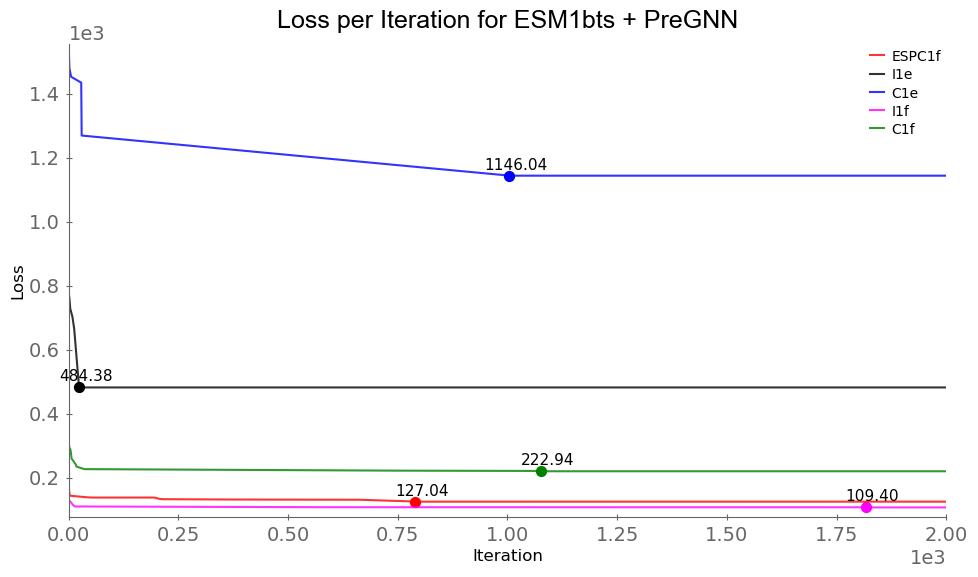

In [24]:
log_directory = '/Users/vahidatabaigi/SIP/ESP_HardSplits/data/Reports/hyperOp_report'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'ESPC1f': 'red', 'C1e': 'blue', 'C1f': 'green', 'I1e': 'black', 'I1f': 'magenta'}

plotting_loss("ECFP", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=3)
plotting_loss("PreGNN", experiment="1D", log_directory=log_directory, color_map=color_map, split_number=3)

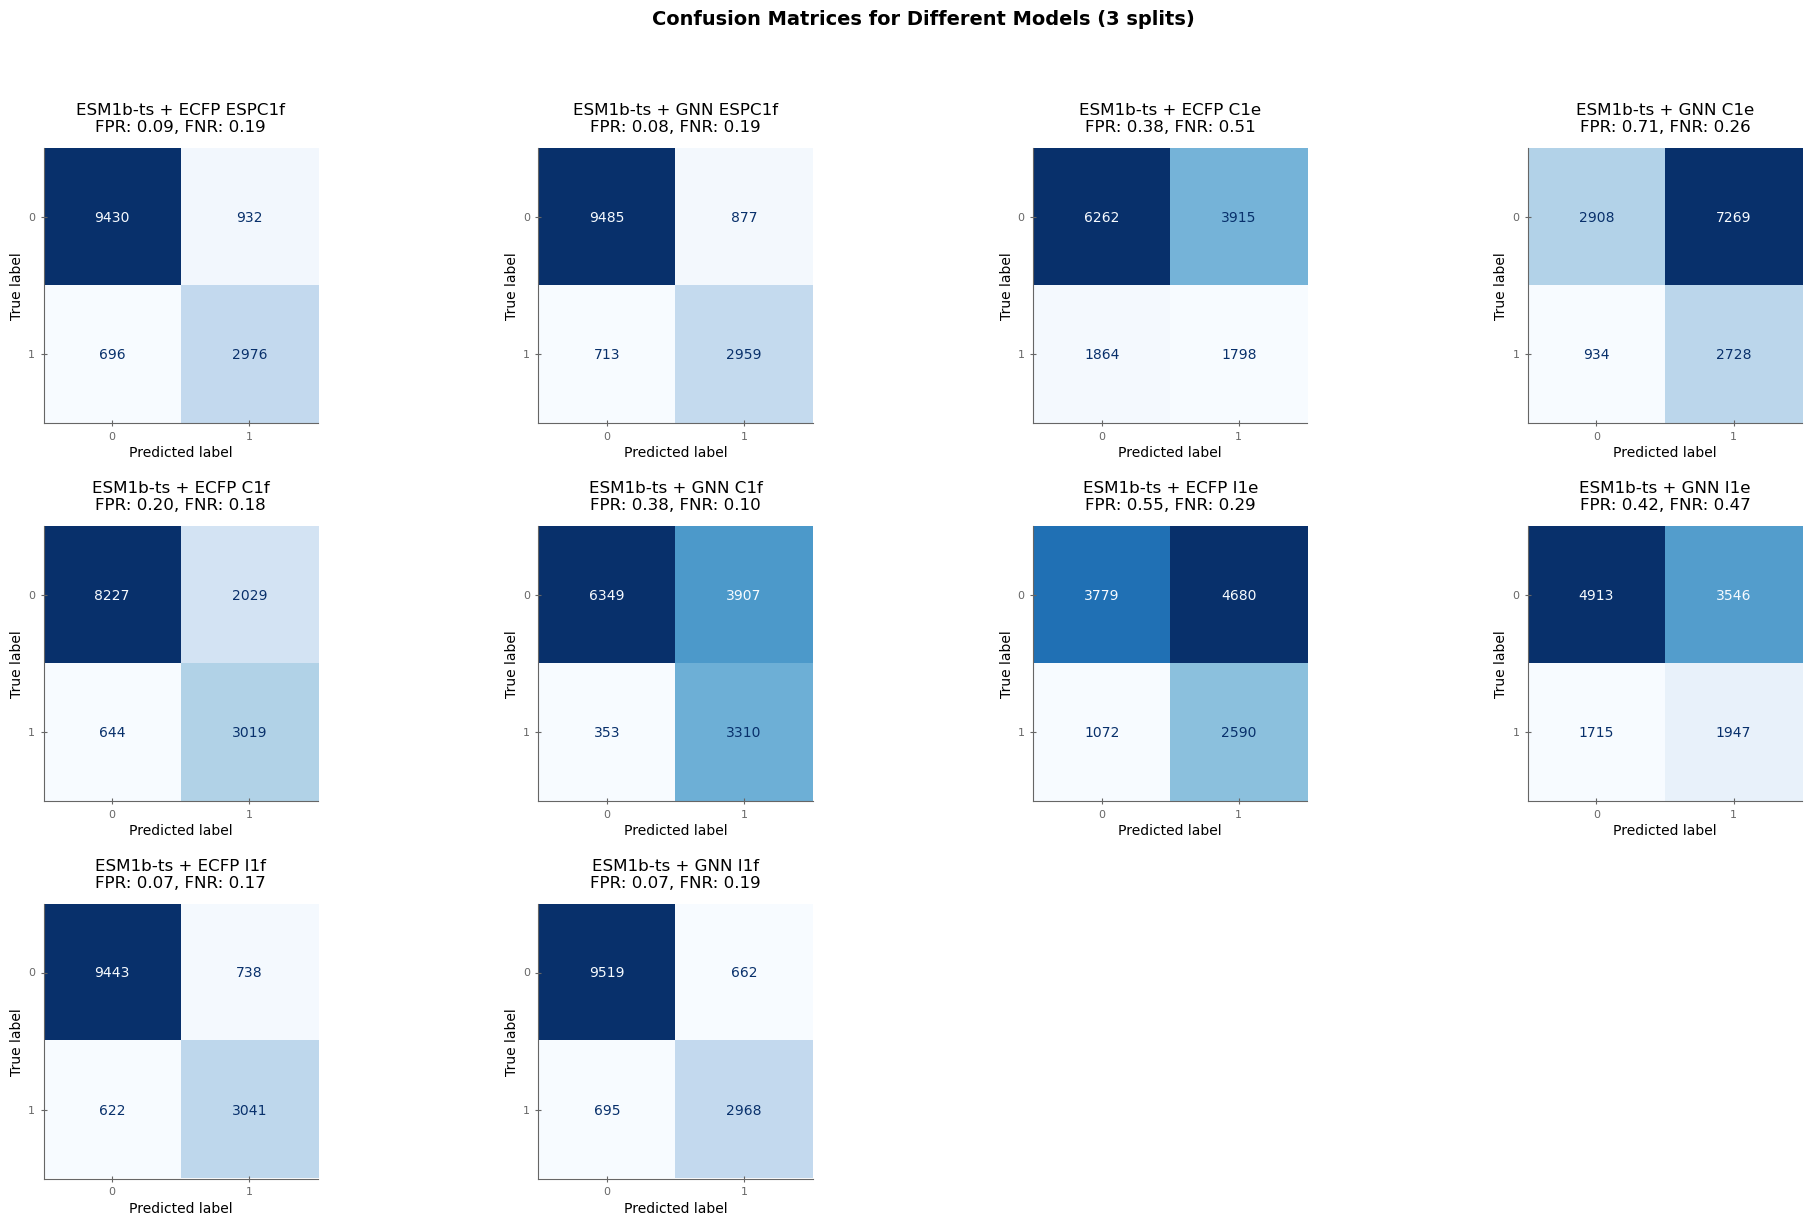

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def calculate_fpr_fnr(y_true, y_pred):
    y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_true, y_pred_binary)
    TN, FP, FN, TP = cm.ravel()
    fpr = FP / (FP + TN)
    fnr = FN / (FN + TP)
    return fpr, fnr, cm
datasets = [
    ('ECFP ESPC1f', test_y_esm1b_ts_ecfp_ESPC1f_3S, y_test_pred_esm1b_ts_ecfp_ESPC1f_3S),
    ('GNN ESPC1f', test_y_esm1b_ts_gnn_ESPC1f_3S, y_test_pred_esm1b_ts_gnn_ESPC1f_3S),
    ('ECFP C1e', test_y_esm1b_ts_ecfp_C1e_3S, y_test_pred_esm1b_ts_ecfp_C1e_3S),
    ('GNN C1e', test_y_esm1b_ts_gnn_C1e_3S, y_test_pred_esm1b_ts_gnn_C1e_3S),
    ('ECFP C1f', test_y_esm1b_ts_ecfp_C1f_3S, y_test_pred_esm1b_ts_ecfp_C1f_3S),
    ('GNN C1f', test_y_esm1b_ts_gnn_C1f_3S, y_test_pred_esm1b_ts_gnn_C1f_3S),
    ('ECFP I1e', test_y_esm1b_ts_ecfp_I1e_3S, y_test_pred_esm1b_ts_ecfp_I1e_3S),
    ('GNN I1e', test_y_esm1b_ts_gnn_I1e_3S, y_test_pred_esm1b_ts_gnn_I1e_3S),
    ('ECFP I1f', test_y_esm1b_ts_ecfp_I1f_3S, y_test_pred_esm1b_ts_ecfp_I1f_3S),
    ('GNN I1f', test_y_esm1b_ts_gnn_I1f_3S, y_test_pred_esm1b_ts_gnn_I1f_3S)
]

n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))
fig.suptitle('Confusion Matrices for Different Models (3 splits)', fontsize=14)
for i, (name, y_true, y_pred) in enumerate(datasets):
    fpr, fnr, cm = calculate_fpr_fnr(y_true, y_pred)
    row, col = divmod(i, n_cols)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col], cmap='Blues', colorbar=False)
    axes[row, col].set_title(f"ESM1b-ts + {name}\nFPR: {fpr:.2f}, FNR: {fnr:.2f}", fontsize=12)
    for text in axes[row, col].texts:
        text.set_fontsize(10)
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)
    axes[row, col].set_xlabel(axes[row, col].get_xlabel(), fontsize=10)
    axes[row, col].set_ylabel(axes[row, col].get_ylabel(), fontsize=10)
for j in range(len(datasets), n_rows * n_cols):
    fig.delaxes(axes.flat[j])
plt.subplots_adjust(hspace=0.9, wspace=0.1)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# C1e vs C2

### ROC-AUC score for C1 splits vs C2 split

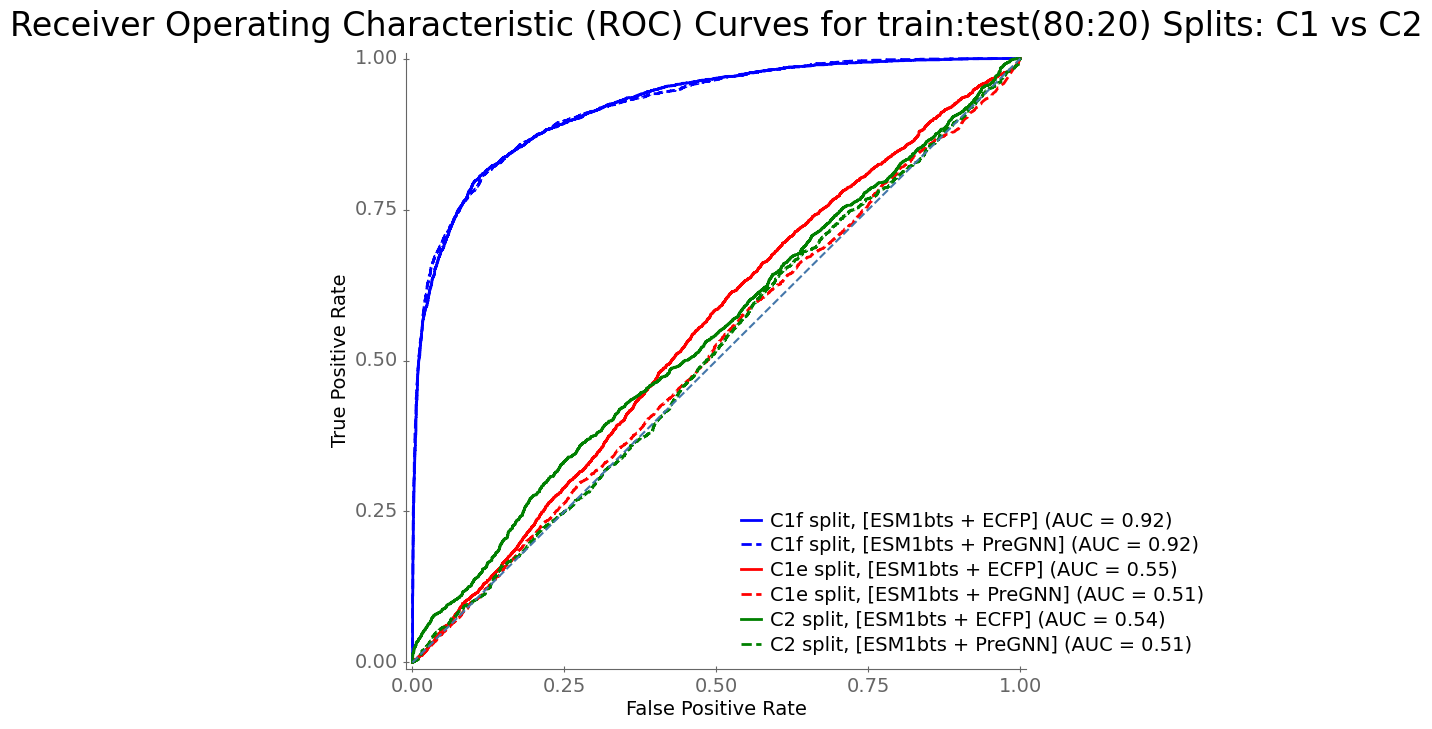

In [97]:
def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 20})

# Define your data and labels here
data = [
    
    (fpr_esm1b_ts_ecfp_C1f_2S, tpr_esm1b_ts_ecfp_C1f_2S, roc_auc_esm1b_ts_ecfp_C1f_2S, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f_2S, tpr_esm1b_ts_gnn_C1f_2S, roc_auc_esm1b_ts_gnn_C1f_2S, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),

    (fpr_esm1b_ts_ecfp_C1e_2S, tpr_esm1b_ts_ecfp_C1e_2S, roc_auc_esm1b_ts_ecfp_C1e_2S, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e_2S, tpr_esm1b_ts_gnn_C1e_2S, roc_auc_esm1b_ts_gnn_C1e_2S, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
    
    (fpr_esm1b_ts_ecfp_C2_2S, tpr_esm1b_ts_ecfp_C2_2S, roc_auc_esm1b_ts_ecfp_C2_2S, 'C2 split, [ESM1bts + ECFP]', 'solid','green'),
    (fpr_esm1b_ts_gnn_C2_2S, tpr_esm1b_ts_gnn_C2_2S, roc_auc_esm1b_ts_gnn_C2_2S,'C2 split, [ESM1bts + PreGNN]', 'dashed','green'),

]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', bbox_to_anchor=(1.30, 0.01), fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for train:test(80:20) Splits: C1 vs C2')
plt.show()
